In [1]:
from sympy import *
init_printing()

### 5.1.4 Compressive strength The

In [3]:
f_c = symbols('f_c')
delta_f = symbols('Delta_f')

In [2]:
delta_f = 8.

In [4]:
f_ck = f_c
f_cm = f_ck + delta_f

Mean compressive strength

In [6]:
f_cm.evalf(subs={f_c: 40})

Biaxial compression strength, MPa


In [8]:
f_bc = 1.15*f_ck
Eq(S('f_bc'), f_bc) 

# Tensile strength
(CEB-FIB Model Code 2010 5.1.5.1)

Mean value of tensile strenght

In [6]:
f_ctm = Piecewise(
    (0.3*pow(f_ck,2./3.),f_ck <= 50),
    (2.12*log(1+0.1*(f_ck+delta_f)), f_ck > 50)
)
Eq(S('f_ctm'), f_ctm)

        ⎧       0.666666666666667              
        ⎪0.3⋅f_c                   for f_c ≤ 50
f_ctm = ⎨                                      
        ⎪2.12⋅log(0.1⋅f_c + 1.8)   for f_c > 50
        ⎩                                      

Lower bounds for characteristic tensile strenght

In [7]:
f_ck_min = 0.7*f_ctm
Eq(S('f_ck_min'),f_ck_min)

               ⎛⎧       0.666666666666667              ⎞
               ⎜⎪0.3⋅f_c                   for f_c ≤ 50⎟
f_ck_min = 0.7⋅⎜⎨                                      ⎟
               ⎜⎪2.12⋅log(0.1⋅f_c + 1.8)   for f_c > 50⎟
               ⎝⎩                                      ⎠

Upper bounds for characteristic tensile strenght

In [8]:
f_ck_max = 1.3*f_ctm
Eq(S('f_ck_max'),f_ck_max)

               ⎛⎧       0.666666666666667              ⎞
               ⎜⎪0.3⋅f_c                   for f_c ≤ 50⎟
f_ck_max = 1.3⋅⎜⎨                                      ⎟
               ⎜⎪2.12⋅log(0.1⋅f_c + 1.8)   for f_c > 50⎟
               ⎝⎩                                      ⎠

Uniaxial tensile strenght


In [9]:
f_t = f_ctm
Eq(S('f_t'),f_ctm)

     ⎧       0.666666666666667              
     ⎪0.3⋅f_c                   for f_c ≤ 50
fₜ = ⎨                                      
     ⎪2.12⋅log(0.1⋅f_c + 1.8)   for f_c > 50
     ⎩                                      

Biaxial tensile strength


In [10]:
f_bt = f_t
Eq(S('f_bt'),f_t)

       ⎧       0.666666666666667              
       ⎪0.3⋅f_c                   for f_c ≤ 50
f_bt = ⎨                                      
       ⎪2.12⋅log(0.1⋅f_c + 1.8)   for f_c > 50
       ⎩                                      

Triaxial tensile strength


In [11]:
f_tt = f_t
Eq(S('f_tt'),f_t)
f_tt.evalf(subs={f_c: 40})

# Fracture energy
(CEB-FIB Model Code 2010 5.1.5.2)

Base value for fracture energy, Nmm/mm^2

In [12]:
G_f0 = 0.021+5.357E-4*d_max
Eq(S('G_f0'), G_f0)

### 5.1.7.2 Modulus of elasticity Values

In [13]:
E_c, E_ci, E_c0, E_lc, E_lci= symbols('E_c, E_ci, E_c0, E_lc, E_lci')
alpha_E, alpha_i = symbols('alpha_E, alpha_i')
eta_E = symbols('eta_E')

In [14]:
alpha_E = 1.0

In [15]:
E_c0 = 21.5E+3

In [16]:
E_lci = eta_E*E_ci
Eq(S('E_lci'),E_lci)

In [17]:
eta_E = pow(rho/2200,2)
Eq(S('eta_E'),eta_E)

In [18]:
E_ci=E_c0*alpha_E*pow((f_ck*delta_f)/10,1/3)
Eq(S('E_ci'), E_ci)

In [19]:
E_c = alpha_i*E_ci
Eq(S('E_c'),E_c)

In [20]:
alpha_i = 0.8+0.2*f_cm/88
alpha_i = Piecewise(
    (alpha_i, alpha_i <=1),
    (1, alpha_i > 1)
)
Eq(S('alpha_i'),alpha_i)

     ⎧0.00227272727272727⋅f_c + 0.818181818181818  for 0.00227272727272727⋅f_c
αᵢ = ⎨                                                                        
     ⎩                     1                       for 0.00227272727272727⋅f_c

 + 0.818181818181818 ≤ 1
                        
 + 0.818181818181818 > 1

In [21]:
E_lc = eta_E*E_c
Eq(S('E_lc'),E_lc)

#### 5.1.7.3 Poisson’s ratio For

In [22]:
nu_c = symbols('nu_c')

In [23]:
nu_c = 0.2

In [24]:
Eq(S('nu_c'), nu_c)

### 5.1.8 Stress-strain relations for short-term loading

#### 5.1.8.1 Compression

In [45]:
# Table 3.1 in Eurocode2 
epsilon_c1 = 0.7*pow(f_cm,0.31)
epsilon_c1 = Piecewise(  
    (epsilon_c1,epsilon_c1 <= 2.8),
    (2.8, epsilon_c1 > 2.8)
)

Eq(S('epsilon_c1'),epsilon_c1)


       ⎧               0.31                     0.31      
       ⎪0.7⋅(f_c + 8.0)      for 0.7⋅(f_c + 8.0)     ≤ 2.8
ε_c1 = ⎨                                                  
       ⎪                                        0.31      
       ⎩        2.8          for 0.7⋅(f_c + 8.0)     > 2.8

In [46]:
sigma_c = symbols('sigma_c')
epsilon_c, epsilon_c1  = symbols('epsilon_c, epsilon_c1')
E_ci, E_c1 = symbols('E_ci, E_c1')
k, eta = symbols('k, eta')

In [47]:
eta = epsilon_c/epsilon_c1
Eq(S('eta'),eta)

In [27]:
k = E_ci/E_c1
Eq(S('k'),k)

In [29]:
E_c1=f_cm/abs(epsilon_c1)
Eq(S('E_c1'),E_c1)

                             f_c + 8.0                      
E_c1 = ─────────────────────────────────────────────────────
       │⎧               0.31                     0.31      │
       │⎪0.7⋅(f_c + 8.0)      for 0.7⋅(f_c + 8.0)     ≤ 2.8│
       │⎨                                                  │
       │⎪                                        0.31      │
       │⎩        2.8          for 0.7⋅(f_c + 8.0)     > 2.8│

In [30]:
sigma_c

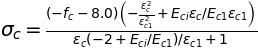

In [31]:
sigma_c = -f_cm*(k*eta-eta**2)/(1+(k-2)*eta)
Eq(S('sigma_c'),sigma_c)

In [32]:
from sympy.plotting import plot
f_c = 40.0

E_c1


                      f_c + 8.0                      
─────────────────────────────────────────────────────
│⎧               0.31                     0.31      │
│⎪0.7⋅(f_c + 8.0)      for 0.7⋅(f_c + 8.0)     ≤ 2.8│
│⎨                                                  │
│⎪                                        0.31      │
│⎩        2.8          for 0.7⋅(f_c + 8.0)     > 2.8│

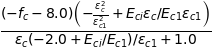

In [33]:
sigma_c.evalf(subs={f_c: 40})